In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import os
import numpy as np
from scipy.special import expit as sigma
dir_path = os.getcwd()


# Exercise 1: Learning in discrete graphical models

Soit les observations $Y = (Y_1, ..., Y_n)$ avec 

$$
Y_i = 
 \bigg(
    \begin{array}{ll}
        X_i \\
        Z_i
    \end{array}
 \bigg)
$$

alors 
$$ p(y) = \prod_i p(y_i) = \prod_i p(x_i | z_i) p(z_i) = \prod_i \theta_{z_i x_i} \pi_{z_i} $$
$$ p(y) = \prod_{m \in \mathcal{M}} \pi_m^{n_m} \prod_{m \in \mathcal{M}, k \in \mathcal{K}} \theta_{mk}^{n_{mk}} $$ où 
$n_{mk} = \sum_i \mathbb{1}\{x_i = k, z_i = m\} =$ "Nombre de couples $(k, m)$ dans les observations"

et 

$n_m = \sum_i \sum_k n_{m, k} = \sum_i \mathbb{1}\{z_i = m\} =$ "Nombre d'observations où  $z_i = m$"

Alors, on veut maximiser
$$ log(p(y)) = \sum_m n_m log(\pi_m) + \sum_{m, k} n_{mk} log(\theta_{mk})$$
sous les contraintes 
$\sum_m \pi_m = 1$
et
$\sum_{m, k} \theta_{mk} = 1$

Posons donc le Lagrangien :

$$ \mathcal{L}(\pi, \theta, \lambda, \mu) =  \sum_m n_m log(\pi_m) + \sum_{m, k} n_{mk} log(\theta_{mk}) - \lambda(\sum_m \pi_m - 1) - \mu(\sum_{m, k} \theta_{mk} - 1)$$ 

En dérivant par rapport à $\pi$:
$$ \frac{\partial \mathcal{L}}{\partial \pi_m} = \frac{n_m}{\pi_m} - \lambda = 0  \Rightarrow \pi_m = \frac{n_m}{\lambda}$$ or avec la contrainte $$\sum_m \pi_m = 1 \Rightarrow \hat{\pi}_m = \frac{n_m}{n}$$

De même, en dérivant par rapport à $\theta$:
$$ \frac{\partial \mathcal{L}}{\partial \theta_{mk}} = \frac{n_{mk}}{\theta_{mk}} - \mu = 0  \Rightarrow \theta_{mk} = \frac{n_{mk}}{\mu}$$ or avec la contrainte $$\sum_{m, k} \theta_{mk} = 1 \Rightarrow \hat{\theta}_{mk} = \frac{n_{mk}}{n}$$

# Exercice 2 :  Linear classification

### 1) Generative model: LDA

(a) Pour une seum observation :
$$ p(y|x) \propto p(x|y)p(y) = \pi^y (1-\pi)^{1-y} p(x|y)$$
$$ p(y|x) \propto \pi^y (1-\pi)^{1-y} (det(\Sigma))^{-1/2} exp(-\frac{y}{2}(x-\mu_1)^T \Sigma^{-1} (x-\mu_1) - \frac{1-y}{2}(x - \mu_0)^T \Sigma^{-1}(x-\mu_0)) $$

$$ p(y|x) \propto \pi^y (1-\pi)^{1-y} (det(\Sigma))^{-1/2} \ exp\big(y x^T \Sigma^{-1} (\mu_1 - \mu_0) + \frac{y}{2}(\mu_0^T \Sigma^{-1}\mu_0 - \mu_1^T \Sigma^{-1}\mu_1) -\frac{1}{2}(x - \mu_0)^T \Sigma^{-1}(x-\mu_0)\big) $$

Donc, pour n observations $(X_i, Y_i)$ iid, on a :

$$ log\big(p(y|x)\big) = log(\pi)\sum_i y_i + log(1-\pi)\sum_i(1- y_i) -\frac{1}{2}det(\Sigma) + \sum_i y_i x_i^T\Sigma^{-1}(\mu_1 - \mu_0) + (\mu_0^T \Sigma^{-1}\mu_0 - \mu_1^T \Sigma^{-1}\mu_1)\sum_i \frac{y_i}{2} \\ -\frac{1}{2}\sum_i (x_i - \mu_0)^T \Sigma^{-1}(x_i-\mu_0) + Cste  $$

donc 
$$
\nabla_{\mu_0}\Big(log\big(p(y|x)\big)\Big) = - \sum_i y_i x_i^T \Sigma^{-1} + 2 \mu_0^T \Sigma^{-1} \sum_i \frac{y_i}{2} + \sum_i (x_i-\mu_0)^T \Sigma^{-1} = 0 
$$

$$ \Leftrightarrow  \mu_0^T  \sum_i y_i + \sum_i x_i^T - \mu_0^T \sum_i 1  = \sum_i y_i x_i^T $$

$$ \Leftrightarrow  \mu_0^T  \sum_i (1-y_i) = \sum_i x_i^T(1-y_i)  $$
$$ \Leftrightarrow  \hat{\mu}_0 = \frac{\sum_i x_i^T(1-y_i)}{\sum_i (1-y_i)}  $$
donc l'estimateur du maximum de vraisemblance pour $\mu_0$ est la moyenne empirique des $x_i$ pour les observations où $y_i = 0$

et


$$\nabla_{\mu_1}\Big(log\big(p(y|x)\big)\Big) = \sum_i y_i x_i^T \Sigma^{-1} - 2 \mu_1^T \Sigma^{-1} \sum_i \frac{y_i}{2}  = 0 $$
$$ \Leftrightarrow \sum_i y_i x_i = \mu_1 \sum_i y_i $$
$$ \Leftrightarrow  \hat{\mu}_1  = \frac{\sum_i y_i x_i}{\sum_i y_i} $$
donc l'estimateur du maximum de vraisemblance pour  $\mu_1$  est la moyenne empirique des $x_i$ pour les observations où $y_i=1$

$$\nabla_\pi \Big(log\big(p(y|x)\big)\Big) = \frac{\sum_i y_i}{\pi} - \frac{\sum_i (1-y_i)}{1-\pi} = 0$$
$$\Leftrightarrow \hat{\pi} = \frac{\sum_i y_i}{n}  $$
donc l'estimateur du maximum de vraisemblance de $\pi$ est la moyenne empirique des $y_i$



In [2]:
modelsName = ['A', 'B', 'C']
d_types = ['train', 'test']
data = dict()
for model in modelsName:
    for d_type in d_types:
        path = dir_path +"/"+"classification_data_HWK1/classification" +model +'.' + d_type 
        data[model+'_'+d_type] = pd.read_csv(path, sep='\t', header=None).values

### 2) Logistic Regression

f is of the form $ f(x) = w^TX + b . \ $ <br>
We can augment X with a row of 1 to remove b of the Equation. <br>
f thus become $ f(x) = w^T\tilde{X} $ <br>
with $\tilde{X} = (X, 1)$

We will need to solve the Modified normal equations using the Newton's method described in the class material


Then if we want to plot $ p(y = 1|x) = 0.5 $ we need to solve the equation $$  \frac{\mathrm{1} }{\mathrm{1} + e^-f(x) } = 0.5  $$ which is equivalent to solving $ f(x) = 0 $ 

We thus need to represent the line of equation $ x_2 = \frac{- b - w_1*x_1}{w_2} $


In [399]:
dd = dict()
dd['A']
w_0 = [[0.55104375], [0.24621418], [0.64676046]]

In [444]:

def IRLS(modelName, i):
    Y = data[modelName +'_train'][:, 2:3]
    X = np.copy(data[modelName + '_train'][:, 0:3])
    # we replaced the third row by the augmented row
    X[:, 2] = 1
    X_t = np.transpose(X)
    w_0= np.random.rand(3, 1)
    w_0init= w_0
    
    eta_0 = np.transpose(sigma(np.dot(np.transpose(w_0), X_t)))
    etaa = eta_0*(1-eta_0)
    
    D_0 = np.diag(etaa[:, 0])
    for t in range(1000):
        if t + 1 % 200 == 0 :
            print(t)
        Y_tilde = Y - eta_0
        
        inv = np.linalg.inv(np.dot(np.dot(X_t, D_0), X))
        first = np.dot(inv, X_t)
        second = np.dot(first, Y_tilde)
        w_0 = w_0 + second

        eta_0 = np.transpose(sigma(np.dot(np.transpose(w_0), X_t)))
        etaa = eta_0*(1-eta_0)
        D_0 = np.diag(etaa[:,0])

#     print(w_0)
#     print(w_0init)
    return w_0


In [468]:
def LogReg_proba_lim(x1,w1,w2,b):
    return -1/w2 * (w1 * x1 + b)

def plotLogRegForModel(modelName, w0): 
    fig, ax = plt.subplots()
    x0_0 = data[modelName+ '_train'][:, 0:1][data[modelName+ '_train'][:, 2]==0]
    x1_0 = data[modelName+ '_train'][:, 1:2][data[modelName+ '_train'][:, 2]==0]
    x0_1 = data[modelName+ '_train'][:, 0:1][data[modelName+ '_train'][:, 2]==1]
    x1_1 = data[modelName+ '_train'][:, 1:2][data[modelName+ '_train'][:, 2]==1]
    ax.scatter(x0_0, x1_0, color="green")
    ax.scatter(x0_1, x1_1, color="red")
    title = "Data plot for Model "+modelName
    plt.plot(range(-10, 10), [LogReg_proba_lim(i,w0[0],w0[1],w0[2]) for i in range(-10, 10)], color='yellow')
    plt.title(title)
    plt.xlabel('x0')
    plt.ylabel('x1')

[[-5530.79672714]
 [-9722.59513895]
 [-1003.86238682]]


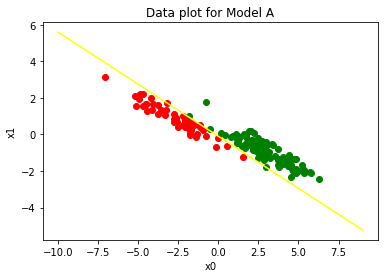

In [470]:
for i in range (100):
    try:
        w0 = IRLS('A', i)
        print(w0)
        plotLogRegForModel('A', w0)
    except:
        pass

In [457]:
def LogReg_proba_lim(x1,w1,w2,b):
    return -1/w2 * (w1 * x1 + b)

def plotLogRegForModel(modelName, w0): 
    fig, ax = plt.subplots()
    x0_0 = data[modelName+ '_train'][:, 0:1][data[modelName+ '_train'][:, 2]==0]
    x1_0 = data[modelName+ '_train'][:, 1:2][data[modelName+ '_train'][:, 2]==0]
    x0_1 = data[modelName+ '_train'][:, 0:1][data[modelName+ '_train'][:, 2]==1]
    x1_1 = data[modelName+ '_train'][:, 1:2][data[modelName+ '_train'][:, 2]==1]
    ax.scatter(x0_0, x1_0, color="green")
    ax.scatter(x0_1, x1_1, color="red")
    title = "Data plot for Model "+modelName
    plt.plot(range(-10, 10), [LogReg_proba_lim(i,w0[0],w0[1],w0[2]) for i in range(-10, 10)], color='green')
    plt.title(title)
    plt.xlabel('x0')
    plt.ylabel('x1')

### 3) Linear Regression

f is of the form $ f(x) = w^TX + b . \ $ <br>
We can augment X with a row of 1 to remove b of the Equation. <br>
f thus become $ f(x) = w^T\tilde{X} $ <br>
with $\tilde{X} = (X, 1)$

We need to solve the normal equation which is : $$ \tilde{X}^T\tilde{X}w-\tilde{X}^Ty=0 $$

In [82]:
def solveNormalEquation(modelName):
    Y = data[modelName +'_train'][:, 2:3]
    X = np.copy(data[modelName + '_train'][:, 0:3])
    # we replaced the third row by the augmented row
    X[:, 2] = 1
    
    rank = np.linalg.matrix_rank(X)
    if rank != 3:
        print("XtX isn't invertible")
    X_t = np.transpose(X)
    beta = np.dot(np.linalg.inv(np.dot(X_t, X)), np.dot(X_t, Y))
    return beta[0][0], beta[1][0], beta[2][0]
    

In [86]:
for name in modelsName:
    omega0, omega1, b = solveNormalEquation(name)
    print('For model {0} learnt parameters are :\n\tw = [{1:.3f},{2:.3f}]\n\tb = {3:.3f}\n'.format(name,
                                                                                                omega0,
                                                                                                omega1,
                                                                                                b))

For model A learnt parameters are :
	w = [-0.264,-0.373]
	b = 0.492

For model B learnt parameters are :
	w = [-0.104,0.052]
	b = 0.500

For model C learnt parameters are :
	w = [-0.128,-0.017]
	b = 0.508



In [102]:
def plotForModel(modelName): 
    fig, ax = plt.subplots()
    x0_0 = data[modelName+ '_train'][:, 0:1][data[modelName+ '_train'][:, 2]==0]
    x1_0 = data[modelName+ '_train'][:, 1:2][data[modelName+ '_train'][:, 2]==0]
    x0_1 = data[modelName+ '_train'][:, 0:1][data[modelName+ '_train'][:, 2]==1]
    x1_1 = data[modelName+ '_train'][:, 1:2][data[modelName+ '_train'][:, 2]==1]
    ax.scatter(x0_0, x1_0, color="green")
    ax.scatter(x0_1, x1_1, color="red")
    title = "Data plot for Model "+modelName
    plt.title(title)
    plt.xlabel('x0')
    plt.ylabel('x1')

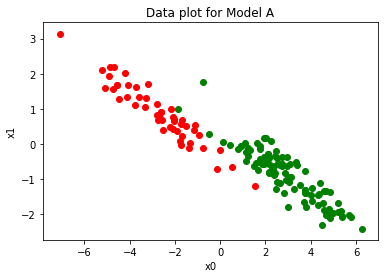

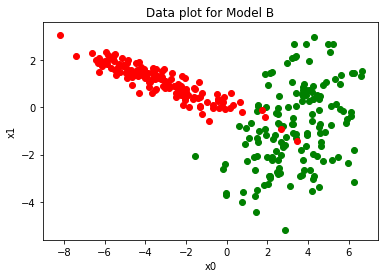

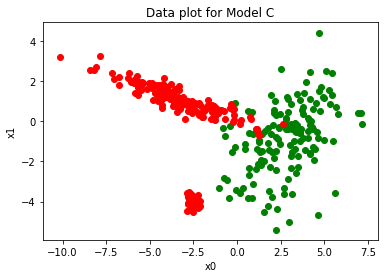

In [103]:
for name in modelsName:
    plotForModel(name)
   